# Modelo de transmissão de energia sem fio- Projeto de Eletromagnetismo

Nessa versão, foram utilizados os valores reais do circuito

In [148]:
from cmath import *
from math import *
from numpy import *
import matplotlib.pyplot as plt

### Bobina 1

Primeiro vamos calcular as reatâncias e impedâncias equivalentes da primeira parte do circuito

In [149]:
C1 = 4.7e-6 #Capacitor escolhido de acordo com as informações da primeira versão
R1 = 719.7e-3 #Resistência medida da bobina
L1 = 0.152e-3 #Indutância medida da bobina

#primeiro é necessário calcular o w do circuito, em um circuito RL o w é dado por 1/(lc)**0.5
w = 1/sqrt(L1*C1)

In [150]:
#Depois vamos calcular as impedâncias equivalentes da bobina 1
XC1 = 1 /(1j*w*C1)
XL1 = 1j*w*L1
ZeqB1 = R1 + XC1 + L1

### Bobina 2

In [151]:
C2 = C1
Rc = 400
L2 = L1
R2 = R1

XC2 = 1 /(1j*w*C2)
XL2 = 1j*w*L2

#porém agora a impedância equivalente será calculada levando em conta que o capacitor C2 está em paralelo com o resistor Rc
ZeqC2RC = 1/((1/XC2)+(1/Rc))
ZeqB2 = R2 + XL2 + ZeqC2RC

#Visto que a tensão na bobina primária é quadrada, há essa alteração na tensão de entrada
Uf = 10*2/pi


k = 0.6 
M = k * sqrt(L1*L2)

frequenciaderessonancia = 1/(2*pi*sqrt(L2*C2))
print("Frequência de ressonância: ", frequenciaderessonancia)

Frequência de ressonância:  5954.556339159688


In [152]:
A = array([[(R1+XL1+XC1),(-1j*w*M)],[(-1j*w*M), (R2+XL2+ZeqC2RC)]])
V = array ([Uf,0])
I = dot(linalg.inv(A),V)

print("Corrente na bobina 1: ", I[0])
print("Corrente na bobina 2: ", I[1])


Corrente na bobina 1:  (0.4170954058685702+0.000570544241070149j)
Corrente na bobina 2:  (0.00012034185825924696+1.7777852736074795j)


### Calculando as correntes de acordo com a frequencia e a capacitância 

In [153]:
#Agora vamos fazer uma função que devolve as correntes para facilitar o plot do gráfico
def correntes (f,C1):
    w = 2*pi*f
    R1 = 719.7e-3
    L1 = 0.134e-3
    Rc = 400
    L2=L1
    C2=C1
    R2=R1
    XC2 = 1 /(1j*w*C2)
    XL2 = 1j*w*L2
    XC1 = 1 /(1j*w*C1)
    XL1 = 1j*w*L1
    ZeqC2RC = 1/((1/XC2)+(1/Rc))
    Uf = 10*(2/pi)
    k=0.1
    M = k * sqrt(L1*L2)
    A = array([[(R1+XL1+XC1),(-1j*w*M)],[(-1j*w*M), (R2+XL2+ZeqC2RC)]])
    V = array ([Uf,0])
    I = dot(linalg.inv(A),V)
    return I[0],I[1]

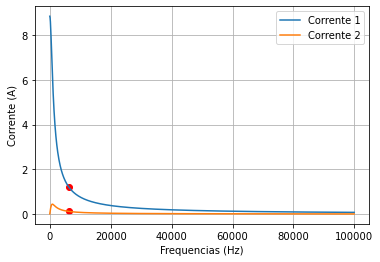

In [154]:
frequencias = range(10,100000,100)
correntes_1 = []
correntes_2 = []

for f in frequencias:
    I1 = correntes(f,0.6)[0]
    I2 = correntes(f,0.6)[1]
    correntes_1.append(abs(I1))
    correntes_2.append(abs(I2))

plt.plot(frequencias,correntes_1, label='Corrente 1')
plt.plot(frequencias,correntes_2, label='Corrente 2')
plt.scatter(6200,abs(correntes(6200,0.6)[0]),c="r")
plt.scatter(6200,abs(correntes(6200,0.6)[1]),c="r")
plt.legend()
plt.xlabel('Frequencias (Hz)')
plt.ylabel('Corrente (A)')
plt.grid()
plt.show()

    

In [155]:
#fazer função que prove isso
ind_freq_corr_max_1 = correntes_1.index(max(correntes_1))
ind_freq_corr_max_2 = correntes_2.index(max(correntes_2))
freq_corr_max_1 = frequencias[ind_freq_corr_max_1]
freq_corr_max_2 = frequencias[ind_freq_corr_max_2]
fressonancia = 1/(2*pi*sqrt(L2*C2))
print("Frequência de ressonância calculada: ", fressonancia)
print("Frequência de ressonância malha 1: ", freq_corr_max_1)
print("Frequência de ressonância malha 2: ", freq_corr_max_2)




Frequência de ressonância calculada:  5954.556339159688
Frequência de ressonância malha 1:  10
Frequência de ressonância malha 2:  910


Quando as correntes são máximas, a frequência correspondentes são iguais a de ressonância? 
</br>
$F_r = 5954.55$ </br>
$F_m1 = 10$ </br>
$F_m2 = 910$ </br>

R: Como podemos ver não são as mesmas, apesar de que no caso da corrente I1, a frequência quando esta chega ao seu valor máximo se aproxima mais da frequência de ressônancia


Com a bobina já montada não tivemos o resultado esperado em relação a tensão V2. Como fazemos o cálculo dela através do produto entre a corrente I2 e a impedância equivalente da associação em paralelo do resistor de carga e o capacitor C2. Assim decidimos, com a indutância da bobina já  montada, fazer a simulação das correntes no domínio da frequência para os 5 capacitores disponíveis e assim descobrir qual era o melhor para a nossa bobina. 

Corrente máxima de acordo com o capacitor 1e-07: 1.568143124369386
Corrente máxima de acordo com o capacitor 1.5e-07: 1.9525425669600427
Corrente máxima de acordo com o capacitor 1e-06: 3.6624492384466008
Corrente máxima de acordo com o capacitor 4.7e-06: 3.9800235142402838
Corrente máxima de acordo com o capacitor 4.7e-07: 3.0984213053957275


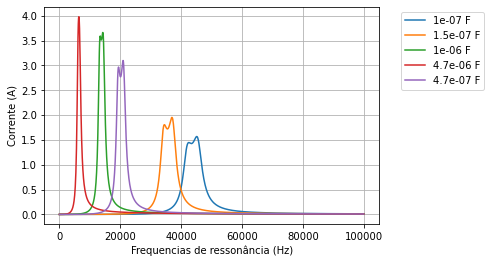

In [156]:
capacitores = [0.1e-6,150e-9,1e-6,4.7e-6,0.47e-6]

freq_reson = range(1,100000,100)

In_lis89 = [[],[],[],[],[],[]]


for C in capacitores:
    for fr in freq_reson:
        In_lis89[capacitores.index(C)].append(abs(correntes(fr,C)[1]))
        
    print(f"Corrente máxima de acordo com o capacitor {C}: {max(In_lis89[capacitores.index(C)])}")



#plotando os gráficos
for i in range(0,5):
    plt.plot(freq_reson,In_lis89[i],label=f'{capacitores[i]} F')

plt.legend(bbox_to_anchor=(1.05, 1),loc='upper left')
plt.xlabel('Frequencias de ressonância (Hz)')
plt.ylabel('Corrente (A)')
plt.grid()
plt.show()



Dessa forma, o capacitor que atinge maior corrente da segunda bobina é: **4.7e-06**

## Escolha da Frequência de operação do circuito

### Tensão V2 de acordo com as indutâncias e frequência de ressonância

In [157]:

def V2 (L, fr):
    #definindo variavéis
    C = 1/(fr**2*4*pi**2*L)
    w = 2*pi*fr
    XC = 1/(1j*w*C)
    XL = 1j*w*L
    R = 1
    Rc = 400
    k = 0.1
    
    #cálculo da corrente I2  
    ZeqCRc = 1/((1/XC)+(1/Rc))
    Uf = 10
    M = k * sqrt(L**2)
    A = array([[(R+XL+XC),(-1j*w*M)],[(-1j*w*M), (R+XL+ZeqCRc)]])
    V = array ([Uf,0])
    I2 = dot(linalg.inv(A),V)[1]


    return ZeqCRc*I2

In [158]:
#definindo valores de V2 pra cada indutância e assim para cada frequência
indutancias = [100e-6,500e-6,200e-6,300e-6,400e-6,0.14e-3]
freq_reson = range(1,100000,100)

In_lis = [[],[],[],[],[],[]]

contador = 0
for L in indutancias:
        for fr in freq_reson:
            In_lis[indutancias.index(L)].append(abs(V2(L,fr)))
            contador+=1

print(len(In_lis[1]))

1000


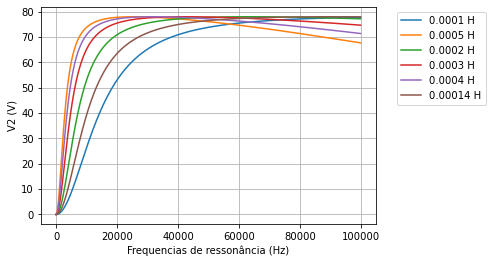

In [159]:
#plotando os gráficos
for i in range(0,6):
    plt.plot(freq_reson,In_lis[i],label=f'{indutancias[i]} H')
    

plt.legend(bbox_to_anchor=(1.05, 1),loc='upper left')
plt.xlabel('Frequencias de ressonância (Hz)')
plt.ylabel('V2 (V)')
plt.grid()
plt.show()

### Tensão V2 de acordo com as capacitâncias e frequência de ressonância

In [160]:
def V2_2 (C, fr):
    #definindo variavéis
    L = 0.152e-3
    w = 2*pi*fr
    XC = 1/(1j*w*C)
    XL = 1j*w*L
    R = 719.7e-3
    Rc = 400
    k = 0.1
    
    #cálculo da corrente I2  
    ZeqCRc = 1/((1/XC)+(1/Rc))
    Uf = 10*2/pi
    M = k * sqrt(L**2)
    A = array([[(R+XL+XC),(-1j*w*M)],[(-1j*w*M), (R+XL+ZeqCRc)]])
    V = array ([Uf,0])
    I2 = dot(linalg.inv(A),V)[1]


    return ZeqCRc*I2

54.798248933091955
55.87337114842132
44.502251577233906
22.926026869990533
52.858491045700355


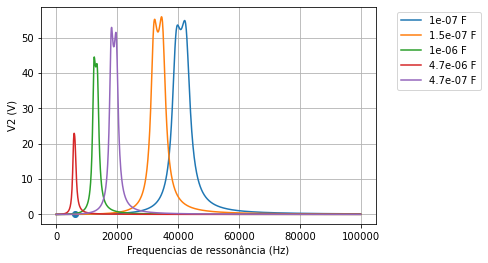

In [161]:
capacitores = [0.1e-6,150e-9,1e-6,4.7e-6,0.47e-6]

freq_reson = range(1,100000,100)

In_lis89 = [[],[],[],[],[],[]]


for C in capacitores:
    for fr in freq_reson:
        In_lis89[capacitores.index(C)].append(abs(V2_2(C,fr)))
        
    print(max(In_lis89[capacitores.index(C)]))



#plotando os gráficos
for i in range(0,5):
    plt.plot(freq_reson,In_lis89[i],label=f'{capacitores[i]} F')

plt.scatter(6200,abs(V2_2(4.7e-7,6200)))
plt.legend(bbox_to_anchor=(1.05, 1),loc='upper left')
plt.xlabel('Frequencias de ressonância (Hz)')
plt.ylabel('V2 (V)')
plt.grid()
plt.show()



#1.5 e-07

## 5) Calculo da potência real de acordo com as indutâncias e a frquência de ressonância

In [162]:
#S = P + jQ -> queremos o P
#S = Vef * Ief*

#definindo função para calcular o P
def potencia_real(L, fr):
    #definindo variavéis
    C = 1/(fr**2*4*pi**2*L)
    w = 2*pi*fr
    XC = 1/(1j*w*C)
    XL = 1j*w*L
    R = 5
    Rc = 4
    k = 0.7
    
    #cálculo da corrente I2  
    ZeqCRc = 1/((1/XC)+(1/Rc))
    Uf = 10
    M = k * sqrt(L**2)
    A = array([[(R+XL+XC),(-1j*w*M)],[(-1j*w*M), (R+XL+ZeqCRc)]])
    V = array ([Uf,0])
    I1 = dot(linalg.inv(A),V)[0]
    I2 = dot(linalg.inv(A),V)[1]

    #V2
    V2 = ZeqCRc*I2
    
    #cálculo da potência real
    S1 = (Uf/sqrt(2)) * (I1/sqrt(2)).conjugate()
    S2 = (V2/sqrt(2))* (I2/sqrt(2)).conjugate()
    P1 = S1.real
    P2 = S2.real
    return P1, P2

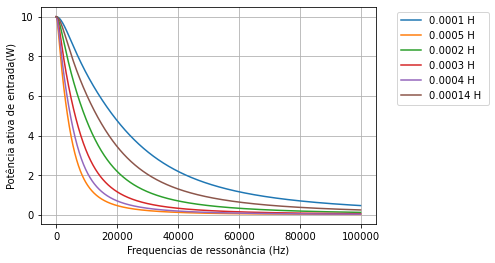

In [163]:
#plotando os gráficos
In_lis2 = [[],[],[],[],[],[]]
In_lis3 = [[],[],[],[],[],[]]
for L in indutancias:
        for fr in freq_reson:
            In_lis2[indutancias.index(L)].append(abs(potencia_real(L,fr)[0]))
            


for i in range(0,6):
    plt.plot(freq_reson,In_lis2[i],label=f'{indutancias[i]} H ')


plt.legend(bbox_to_anchor=(1.05, 1),loc='upper left')
plt.xlabel('Frequencias de ressonância (Hz)')
plt.ylabel('Potência ativa de entrada(W)')
plt.grid()
plt.show()

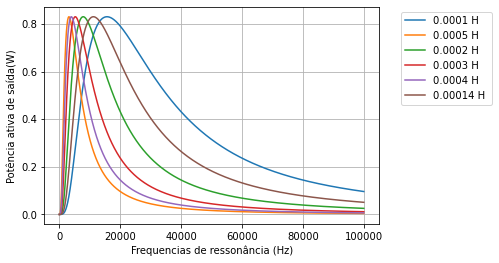

In [164]:
In_lis7 = [[],[],[],[],[],[]]

for L in indutancias:
        for fr in freq_reson:
            In_lis7[indutancias.index(L)].append(abs(potencia_real(L,fr)[1]))
            


for i in range(0,6):
    plt.plot(freq_reson,In_lis7[i],label=f'{indutancias[i]} H ')



plt.legend(bbox_to_anchor=(1.05, 1),loc='upper left')
plt.xlabel('Frequencias de ressonância (Hz)')
plt.ylabel('Potência ativa de saída(W)')
plt.grid()
plt.show()

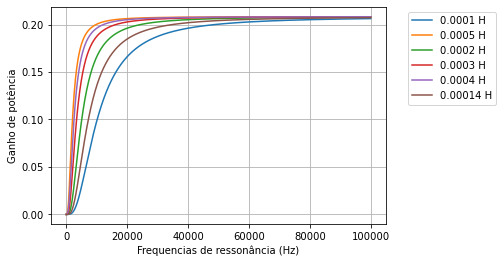

In [165]:
#ganho de potência P = P2/P1
In_lis4 = [[],[],[],[],[],[]]
for L in indutancias:
        for fr in freq_reson:
            In_lis4[indutancias.index(L)].append(abs(potencia_real(L,fr)[1]/potencia_real(L,fr)[0]))
            
for i in range(0,6):
    plt.plot(freq_reson,In_lis4[i],label=f'{indutancias[i]} H') 


plt.legend(bbox_to_anchor=(1.05, 1),loc='upper left')
plt.xlabel('Frequencias de ressonância (Hz)')
plt.ylabel('Ganho de potência')
plt.grid()
plt.show()


## 6) Gráfico da tensão V2 para diferentes valores de _k_

In [166]:
def V2_3 (k):
    #definindo variavéis
    C = 4.7e-6
    fr = 6200
    L = 0.152e-3
    w = 2*pi*fr
    XC = 1/(1j*w*C)
    XL = 1j*w*L
    R = 719.7e-3
    Rc = 400
    
    #cálculo da corrente I2  
    ZeqCRc = 1/((1/XC)+(1/Rc))
    Uf = 10*2/pi
    M = k * sqrt(L**2)
    A = array([[(R+XL+XC),(-1j*w*M)],[(-1j*w*M), (R+XL+ZeqCRc)]])
    V = array ([Uf,0])
    I2 = dot(linalg.inv(A),V)[1]


    return ZeqCRc*I2

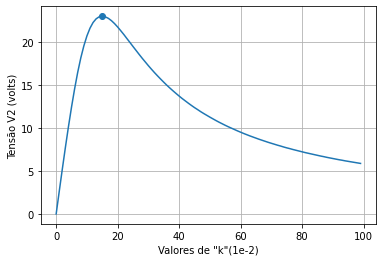

[0.0, 2.62, 5.21, 7.73, 10.15, 12.43, 14.54, 16.45, 18.12, 19.53, 20.69, 21.59, 22.25, 22.68, 22.92, 22.98, 22.91, 22.73, 22.46, 22.12, 21.73, 21.3, 20.86, 20.39, 19.93, 19.46, 19.0, 18.54, 18.09, 17.66, 17.23, 16.82, 16.42, 16.04, 15.67, 15.31, 14.96, 14.63, 14.31, 14.0, 13.7, 13.41, 13.14, 12.87, 12.61, 12.36, 12.13, 11.89, 11.67, 11.46, 11.25, 11.05, 10.85, 10.66, 10.48, 10.3, 10.13, 9.97, 9.81, 9.65, 9.5, 9.35, 9.21, 9.07, 8.94, 8.81, 8.68, 8.56, 8.44, 8.32, 8.21, 8.1, 7.99, 7.89, 7.78, 7.68, 7.59, 7.49, 7.4, 7.31, 7.22, 7.13, 7.05, 6.97, 6.89, 6.81, 6.73, 6.66, 6.58, 6.51, 6.44, 6.37, 6.3, 6.24, 6.17, 6.11, 6.05, 5.99, 5.93, 5.87]


In [167]:
valores_k = range(0,100,1)

tensao_p_k =  []

for i in valores_k:
    i = i/100
    tensao_p_k.append(abs(V2_3(i)).round(2))

plt.plot(valores_k,tensao_p_k)
plt.scatter((14.8), max(tensao_p_k))
plt.xlabel('Valores de "k"(1e-2)')
plt.ylabel("Tensão V2 (volts)")
plt.grid()
plt.show()
print(tensao_p_k)


Para chegarmos a conclusão desejada, foi medido as diferentes tensões de acordo com as diferentes distâncias entre as bobinas:

In [168]:
valoresdetensaomedidos = [21.00,16.50,14.30,12.50,7.46,6.45,4.84,4.28,3.36,2.31]
ks_pordistancia = []
tensao_p_k_menores = tensao_p_k[0:tensao_p_k.index(max(tensao_p_k))]
for u_med in valoresdetensaomedidos:
    tensao_associada = min(tensao_p_k_menores, key=lambda x: abs(x-u_med))
    ks_pordistancia.append((valores_k[tensao_p_k_menores.index(tensao_associada)])/100) 

ks_pordistancia

[0.1, 0.07, 0.06, 0.05, 0.03, 0.02, 0.02, 0.02, 0.01, 0.01]

Agora, com os diferentes ks calculados, é possível analisar o impacto da distância entre as bobinas no fator de acoplamento e, consequentemente, na indutância mutua

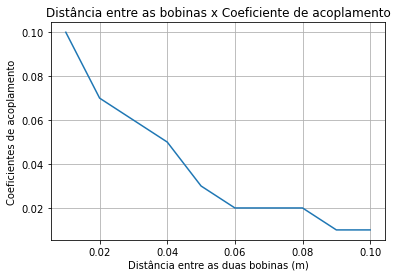

In [169]:

distancias = [0.01,0.02,0.03,0.04,0.05,0.06,0.07,0.08,0.09,0.1]
plt.plot(distancias,ks_pordistancia)
plt.grid()
plt.xlabel("Distância entre as duas bobinas (m)")
plt.ylabel("Coeficientes de acoplamento")
plt.title("Distância entre as bobinas x Coeficiente de acoplamento")
plt.show()


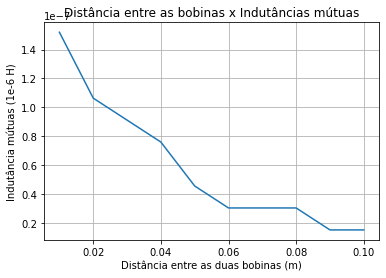

In [170]:
L = 0.152e-3
mutuas = []
for i in ks_pordistancia:
    mutuas.append(L*(i/100))

plt.plot(distancias,mutuas)
plt.grid()
plt.xlabel("Distância entre as duas bobinas (m)")
plt.ylabel("Indutância mútuas (1e-6 H)")
plt.title("Distância entre as bobinas x Indutâncias mútuas")
plt.show()

## Cálculo da potência com o coeficiente de acoplamento ideal

In [171]:
#Com o k=0.14 (ideal) a tensão medida foi de 21.0V, com isso podemos fazer o cálculo da potência real de saída utilizando o resistor de carga

p_real_saida = (21**2)/400


In [172]:
#Comparação de tensão esperada com o k ideal e a tensão medida
abs(V2_3(0.14))


22.916923344131114